In [11]:
from DEC import DEC
import os, csv
import datasets
from keras.optimizers import SGD
from keras.initializers import VarianceScaling
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

expdir='./results/exp1'
if not os.path.exists(expdir):
    os.mkdir(expdir)

logfile = open(expdir + '/results.csv', 'a')
logwriter = csv.DictWriter(logfile, fieldnames=['trials', 'acc', 'nmi', 'ari'])
logwriter.writeheader()

trials=1
for db in ['mnist']:
    logwriter.writerow(dict(trials=db, acc='', nmi='', ari=''))
    save_db_dir = os.path.join(expdir, db)
    if not os.path.exists(save_db_dir):
        os.mkdir(save_db_dir)

        # load dataset
    from datasets import load_data

    x, y = load_data(db)
    n_clusters = len(np.unique(y))

    init = 'glorot_uniform'
    pretrain_optimizer = 'adam'
    # setting parameters
    if db == 'mnist' or db == 'fmnist':
        update_interval = 140
        pretrain_epochs = 200
        init = VarianceScaling(scale=1. / 3., mode='fan_in',
                               distribution='uniform')  # [-limit, limit], limit=sqrt(1./fan_in)
        pretrain_optimizer = SGD(learning_rate=1, momentum=0.9)

    # prepare model
    dims = [x.shape[-1], 500, 500, 2000, 10]

    '''Training for base and nosp'''
    results = np.zeros(shape=(trials, 3))
    baseline = np.zeros(shape=(trials, 3))
    metrics0=[]
    metrics1=[]
    for i in range(trials):  # base
        save_dir = os.path.join(save_db_dir, 'trial%d' % i)
        if not os.path.exists(save_dir):
            os.mkdir(save_dir)

        dec = DEC(dims=[x.shape[-1], 500, 500, 2000, 10], n_clusters=n_clusters, init=init)
        dec.pretrain(x=x, y=y, optimizer=pretrain_optimizer,
                     epochs=pretrain_epochs,
                     save_dir=save_dir)
        dec.compile(optimizer=SGD(0.01, 0.9), loss='kld')
        dec.fit(x, y=y,
                update_interval=update_interval,
                save_dir=save_dir)

        log = open(os.path.join(save_dir, 'dec_log.csv'), 'r')
        reader = csv.DictReader(log)
        metrics = []
        for row in reader:
            metrics.append([row['acc'], row['nmi'], row['ari']])
        metrics0.append(metrics[0])
        metrics1.append(metrics[-1])
        log.close()

    metrics0, metrics1 = np.asarray(metrics0, dtype=float), np.asarray(metrics1, dtype=float)
    for t, line in enumerate(metrics0):
        logwriter.writerow(dict(trials=t, acc=line[0], nmi=line[1], ari=line[2]))
    logwriter.writerow(dict(trials=' ', acc=np.mean(metrics0, 0)[0], nmi=np.mean(metrics0, 0)[1], ari=np.mean(metrics0, 0)[2]))
    for t, line in enumerate(metrics1):
        logwriter.writerow(dict(trials=t, acc=line[0], nmi=line[1], ari=line[2]))
    logwriter.writerow(dict(trials=' ', acc=np.mean(metrics1, 0)[0], nmi=np.mean(metrics1, 0)[1], ari=np.mean(metrics1, 0)[2]))

logfile.close()

MNIST samples (70000, 784)
...Pretraining...


/home/ethan/.local/lib/python3.8/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/200
2188/2188 [==============================] - 5s 2ms/step
        |==>  acc: 0.3314,  nmi: 0.2733  <==|
274/274 [==============================] - 15s 55ms/step - loss: 0.0647
Epoch 2/200
274/274 [==============================] - 6s 23ms/step - loss: 0.0450
Epoch 3/200
274/274 [==============================] - 6s 23ms/step - loss: 0.0330
Epoch 4/200
274/274 [==============================] - 6s 23ms/step - loss: 0.0276
Epoch 5/200
274/274 [==============================] - 6s 24ms/step - loss: 0.0246
Epoch 6/200
274/274 [==============================] - 7s 24ms/step - loss: 0.0229
Epoch 7/200
274/274 [==============================] - 6s 23ms/step - loss: 0.0216
Epoch 8/200
274/274 [==============================] - 6s 23ms/step - loss: 0.0207
Epoch 9/200
274/274 [==============================] - 6s 23ms/step - loss: 0.0199
Epoch 10/200
274/274 [==============================] - 6s 22ms/step - loss: 0.0192
Epoch 11/200
274/274 [==============================] - 6s 22ms/s

2023-04-05 13:38:51.634310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]


saving model to: ./results/exp1/mnist/trial0/DEC_model_0.h5


2023-04-05 13:38:51.952717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:38:51.967994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:38:51.984173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 140: acc = 0.90953, nmi = 0.82116, ari = 0.81509  ; loss= 0.04799


2023-04-05 13:38:59.210940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:38:59.226402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:38:59.242119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 280: acc = 0.92317, nmi = 0.84160, ari = 0.84176  ; loss= 0.15225


2023-04-05 13:39:06.620587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:06.636117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:06.651326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 420: acc = 0.93113, nmi = 0.85447, ari = 0.85765  ; loss= 0.20702


2023-04-05 13:39:13.888505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:13.903632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:13.919459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 560: acc = 0.93591, nmi = 0.86294, ari = 0.86733  ; loss= 0.21702


2023-04-05 13:39:21.204455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:21.220139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:21.236951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 700: acc = 0.93966, nmi = 0.86879, ari = 0.87460  ; loss= 0.21183


2023-04-05 13:39:28.493984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:28.509596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:28.524761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 840: acc = 0.94170, nmi = 0.87194, ari = 0.87850  ; loss= 0.20848


2023-04-05 13:39:35.824716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:35.844984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:35.863297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 980: acc = 0.94387, nmi = 0.87584, ari = 0.88280  ; loss= 0.20779


2023-04-05 13:39:43.233150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:43.248934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:43.263672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 1120: acc = 0.94560, nmi = 0.87856, ari = 0.88617  ; loss= 0.19884


2023-04-05 13:39:50.516818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:50.532063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:50.546967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 1260: acc = 0.94681, nmi = 0.88067, ari = 0.88859  ; loss= 0.19772


2023-04-05 13:39:57.756951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:57.772521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:57.787424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

saving model to: ./results/exp1/mnist/trial0/DEC_model_1365.h5


2023-04-05 13:39:59.664576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:59.680754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:39:59.696277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 1400: acc = 0.94753, nmi = 0.88188, ari = 0.89001  ; loss= 0.19304


2023-04-05 13:40:05.203969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:05.219277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:05.234838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 1540: acc = 0.94796, nmi = 0.88288, ari = 0.89090  ; loss= 0.18035


2023-04-05 13:40:12.765906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:12.781094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:12.796085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 1680: acc = 0.94823, nmi = 0.88331, ari = 0.89145  ; loss= 0.1753


2023-04-05 13:40:20.245213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:20.261531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:20.277135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 1820: acc = 0.94883, nmi = 0.88460, ari = 0.89267  ; loss= 0.18431


2023-04-05 13:40:27.667268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:27.682679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:27.697984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 1960: acc = 0.94901, nmi = 0.88499, ari = 0.89306  ; loss= 0.1685


2023-04-05 13:40:35.597543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:35.613298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:35.628629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 2100: acc = 0.94960, nmi = 0.88598, ari = 0.89422  ; loss= 0.17034


2023-04-05 13:40:43.226679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:43.242002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:43.258262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 2240: acc = 0.94987, nmi = 0.88680, ari = 0.89479  ; loss= 0.16959


2023-04-05 13:40:51.061417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:51.077532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:51.094251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 2380: acc = 0.95016, nmi = 0.88722, ari = 0.89530  ; loss= 0.16451


2023-04-05 13:40:59.240933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:59.257500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:40:59.275141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 2520: acc = 0.95020, nmi = 0.88743, ari = 0.89542  ; loss= 0.16099


2023-04-05 13:41:06.894199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:06.910356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:06.925471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 2660: acc = 0.95051, nmi = 0.88785, ari = 0.89598  ; loss= 0.17237


2023-04-05 13:41:14.210640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:14.225637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:14.244581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

saving model to: ./results/exp1/mnist/trial0/DEC_model_2730.h5


2023-04-05 13:41:15.454257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:15.470400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:15.486419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 2800: acc = 0.95050, nmi = 0.88795, ari = 0.89596  ; loss= 0.15683


2023-04-05 13:41:21.592804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:21.608326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:21.624539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 2940: acc = 0.95041, nmi = 0.88784, ari = 0.89577  ; loss= 0.14632


2023-04-05 13:41:29.118953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:29.134867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:29.152566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 3080: acc = 0.95053, nmi = 0.88811, ari = 0.89600  ; loss= 0.14999


2023-04-05 13:41:36.585961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:36.601887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:36.618006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 3220: acc = 0.95067, nmi = 0.88836, ari = 0.89628  ; loss= 0.14271


2023-04-05 13:41:44.069387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:44.085044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:44.101255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 3360: acc = 0.95090, nmi = 0.88890, ari = 0.89675  ; loss= 0.1401


2023-04-05 13:41:51.697671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:51.714923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:51.731705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 3500: acc = 0.95110, nmi = 0.88930, ari = 0.89712  ; loss= 0.14311


2023-04-05 13:41:59.120324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:59.135830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:41:59.153351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 3640: acc = 0.95104, nmi = 0.88926, ari = 0.89700  ; loss= 0.1422


2023-04-05 13:42:06.537253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:06.552893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:06.569243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 3780: acc = 0.95104, nmi = 0.88931, ari = 0.89697  ; loss= 0.13296


2023-04-05 13:42:13.847419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:13.863329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:13.878587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 3920: acc = 0.95084, nmi = 0.88915, ari = 0.89660  ; loss= 0.13584


2023-04-05 13:42:21.160041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:21.175541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:21.190922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 4060: acc = 0.95074, nmi = 0.88901, ari = 0.89639  ; loss= 0.13832


2023-04-05 13:42:28.555263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:28.571380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:28.588541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

saving model to: ./results/exp1/mnist/trial0/DEC_model_4095.h5


2023-04-05 13:42:29.187991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:29.206951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:29.221978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 4200: acc = 0.95063, nmi = 0.88897, ari = 0.89620  ; loss= 0.12712


2023-04-05 13:42:35.938079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:35.954385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:35.970168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 4340: acc = 0.95057, nmi = 0.88891, ari = 0.89607  ; loss= 0.126


2023-04-05 13:42:43.378253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:43.401281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:43.420670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 4480: acc = 0.95053, nmi = 0.88865, ari = 0.89596  ; loss= 0.1266


2023-04-05 13:42:50.909490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:50.925586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:50.941077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 4620: acc = 0.95060, nmi = 0.88884, ari = 0.89611  ; loss= 0.13095


2023-04-05 13:42:58.241625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:58.256738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:42:58.272720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 4760: acc = 0.95063, nmi = 0.88870, ari = 0.89617  ; loss= 0.13013


2023-04-05 13:43:05.552665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:05.568161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:05.584171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 4900: acc = 0.95066, nmi = 0.88901, ari = 0.89623  ; loss= 0.12532


2023-04-05 13:43:13.470374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:13.486171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:13.501729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 5040: acc = 0.95057, nmi = 0.88884, ari = 0.89607  ; loss= 0.12164


2023-04-05 13:43:20.884249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:20.900662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:20.917775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 5180: acc = 0.95046, nmi = 0.88860, ari = 0.89582  ; loss= 0.12381


2023-04-05 13:43:28.232430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:28.248620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:28.264307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 5320: acc = 0.95044, nmi = 0.88873, ari = 0.89580  ; loss= 0.12184


2023-04-05 13:43:35.551366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:35.567455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:35.583144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 5460: acc = 0.95040, nmi = 0.88853, ari = 0.89571  ; loss= 0.11873
saving model to: ./results/exp1/mnist/trial0/DEC_model_5460.h5


2023-04-05 13:43:43.215622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:43.255592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:43.272575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 5600: acc = 0.95054, nmi = 0.88891, ari = 0.89599  ; loss= 0.119


2023-04-05 13:43:50.686503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:50.702914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:50.719263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 5740: acc = 0.95047, nmi = 0.88871, ari = 0.89586  ; loss= 0.10916


2023-04-05 13:43:58.397008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:58.413823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:43:58.430215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 5880: acc = 0.95057, nmi = 0.88912, ari = 0.89608  ; loss= 0.11593


2023-04-05 13:44:06.179400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:06.195591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:06.212869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 6020: acc = 0.95051, nmi = 0.88881, ari = 0.89594  ; loss= 0.11387


2023-04-05 13:44:13.908167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:13.929011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:13.950276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 6160: acc = 0.95046, nmi = 0.88885, ari = 0.89586  ; loss= 0.11049


2023-04-05 13:44:21.684016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:21.700158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:21.716513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 6300: acc = 0.95044, nmi = 0.88869, ari = 0.89582  ; loss= 0.10412


2023-04-05 13:44:29.182836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:29.201889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [112,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:29.214948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 6440: acc = 0.95017, nmi = 0.88834, ari = 0.89527  ; loss= 0.10532


2023-04-05 13:44:36.753465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:36.769270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:36.785419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 6580: acc = 0.95020, nmi = 0.88826, ari = 0.89531  ; loss= 0.10983


2023-04-05 13:44:44.239428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:44.255555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:44.271580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 6720: acc = 0.95030, nmi = 0.88857, ari = 0.89552  ; loss= 0.10995


2023-04-05 13:44:51.638003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:51.653632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:51.669914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

saving model to: ./results/exp1/mnist/trial0/DEC_model_6825.h5


2023-04-05 13:44:53.532168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:53.549074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:53.566011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 6860: acc = 0.95021, nmi = 0.88844, ari = 0.89536  ; loss= 0.10295


2023-04-05 13:44:59.247590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:59.265062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256,10]
	 [[{{node Placeholder/_1}}]]
2023-04-05 13:44:59.282857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [256

Iter 7000: acc = 0.95030, nmi = 0.88859, ari = 0.89553  ; loss= 0.11075
delta_label  0.0009142857142857143 < tol  0.001
Reached tolerance threshold. Stopping training.
saving model to: ./results/exp1/mnist/trial0/DEC_model_final.h5


In [10]:
dims

[784, 500, 500, 2000, 10]

MNIST samples (70000, 784)


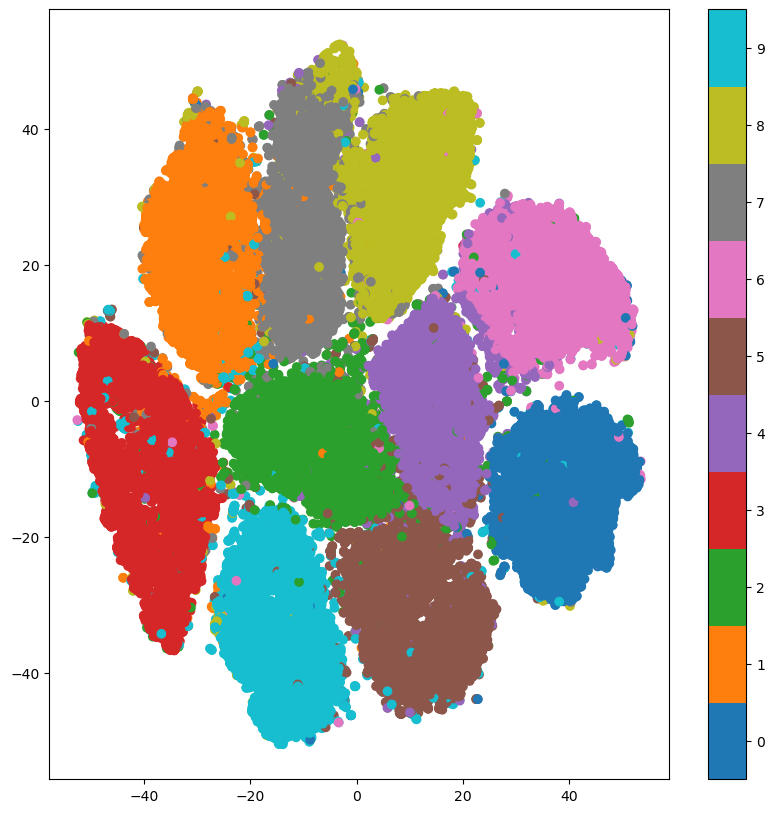

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from DEC import DEC
import datasets

# load dataset
x, y = datasets.load_data('mnist')
n_clusters = len(np.unique(y))

# prepare model
dims = [x.shape[-1], 500, 500, 2000, 10]
dec = DEC(dims=dims, n_clusters=n_clusters)
dec.load_weights('./results/exp1/mnist/trial0/DEC_model_final.h5')

# get cluster assignments
y_pred = dec.predict(x)

# visualize clustering space with t-SNE
tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, random_state=0)
x_tsne = tsne.fit_transform(x)

# plot clustering space
plt.figure(figsize=(10, 10))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_pred, cmap=plt.cm.get_cmap('tab10', n_clusters))
plt.colorbar(ticks=range(n_clusters))
plt.clim(-0.5, n_clusters - 0.5)
plt.show()